Training data shape: (60000, 784)
Test data shape: (10000, 784)
Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3855 - val_loss: 0.1887
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1789 - val_loss: 0.1526
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1488 - val_loss: 0.1333
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1310 - val_loss: 0.1213
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1203 - val_loss: 0.1129
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1126 - val_loss: 0.1074
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1075 - val_loss: 0.1033
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1035 - val_loss: 0.1002
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1007 - val_loss: 0.0979
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0987 - val_loss: 0.0963
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


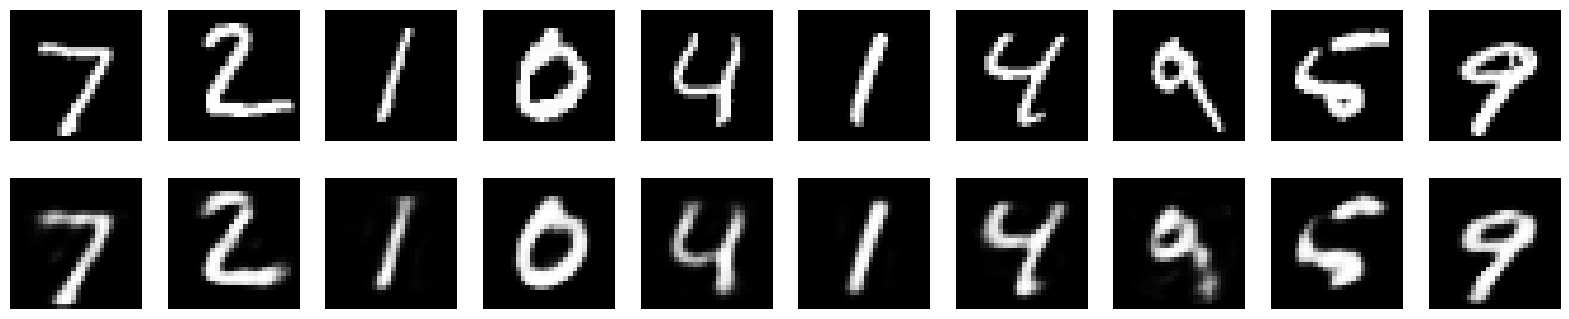

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(X_train, _), (X_test, _) = mnist.load_data()

# Normalize the images to the range [0, 1] and flatten them
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))  # Flatten to (28*28,)
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))  # Flatten to (28*28,)

print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)

# Set encoding dimension (compressed representation size)
encoding_dim = 32  # Smaller value means more compression

# Input layer
input_img = Input(shape=(784,))

# Encoder: Compress the input
encoded = Dense(encoding_dim, activation='relu')(input_img)

# Decoder: Reconstruct the input from the compressed representation
decoded = Dense(784, activation='sigmoid')(encoded)

# Autoencoder model: Map input -> encoded -> decoded
autoencoder = Model(input_img, decoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(X_train, X_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))

# Encode and decode some images
encoded_imgs = autoencoder.predict(X_test)

# Reshape back to 28x28 for visualization
decoded_imgs = encoded_imgs.reshape((-1, 28, 28))

# Visualize original and reconstructed images
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.axis('off')

    # Display reconstructed image
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i])
    plt.gray()
    ax.axis('off')
plt.show()
